In [276]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [277]:
housing_df=pd.read_csv(r"C:\Users\OM RAJ PANDEY\Desktop\Project-Housing--2---1---1-\Project-Housing_splitted\train.csv")

In [278]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [279]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [280]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [281]:
# separting the numerical and categorical feaures for analysis
numeric_df=housing_df.select_dtypes(include=['int64','float64'])
categorical_df=housing_df.select_dtypes(include=['object'])

In [282]:
# Numerical features in the dataframe
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Analyzing Numerical Data

Outlier detection: Checking percentage of outliers for all the numerical columns

Comment: Majority of the numeric features have outliers.
Dropping all the outliers will cause loss of information.
Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percenntile-1.5 IQR, 75th percentile+1.5IQR]
IQR or Inter Quantile Range=Difference between 75th percentile and 25th percentile values of a feature.
Target column 'SalePrice' is excluded in this.

In [283]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR=housing_df[feature].quantile(.75)-housing_df[feature].quantile(.25)
        max_value=housing_df[feature].quantile(.75)+1.5*IQR
        min_value=housing_df[feature].quantile(.25)-1.5*IQR
        housing_df[feature][housing_df[feature]>max_value]=max_value
        housing_df[feature][housing_df[feature]<min_value]=min_value

In [284]:
# Checking the datset after aeassining minimum and maximum values

housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.0,1168.0,1168.0,1168.0,1168.0,1168.000000,1168.000000,1168.000000
mean,724.136130,54.982877,69.894130,9671.869435,6.106164,5.566781,1970.958904,1984.758562,87.333333,440.206978,...,93.913099,42.927226,0.0,0.0,0.0,0.0,0.0,6.344178,2007.804795,181477.005993
std,416.159877,37.149385,19.241774,3514.692231,1.384464,0.973862,30.061548,20.785185,130.890807,434.416564,...,117.913672,53.496965,0.0,0.0,0.0,0.0,0.0,2.686352,1.329738,79105.586863
min,1.000000,20.000000,30.000000,1780.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,215000.000000
max,1460.000000,145.000000,110.000000,17356.500000,10.000000,7.500000,2010.000000,2010.000000,400.000000,1786.250000,...,427.500000,175.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


# Correlation in Numeric Data

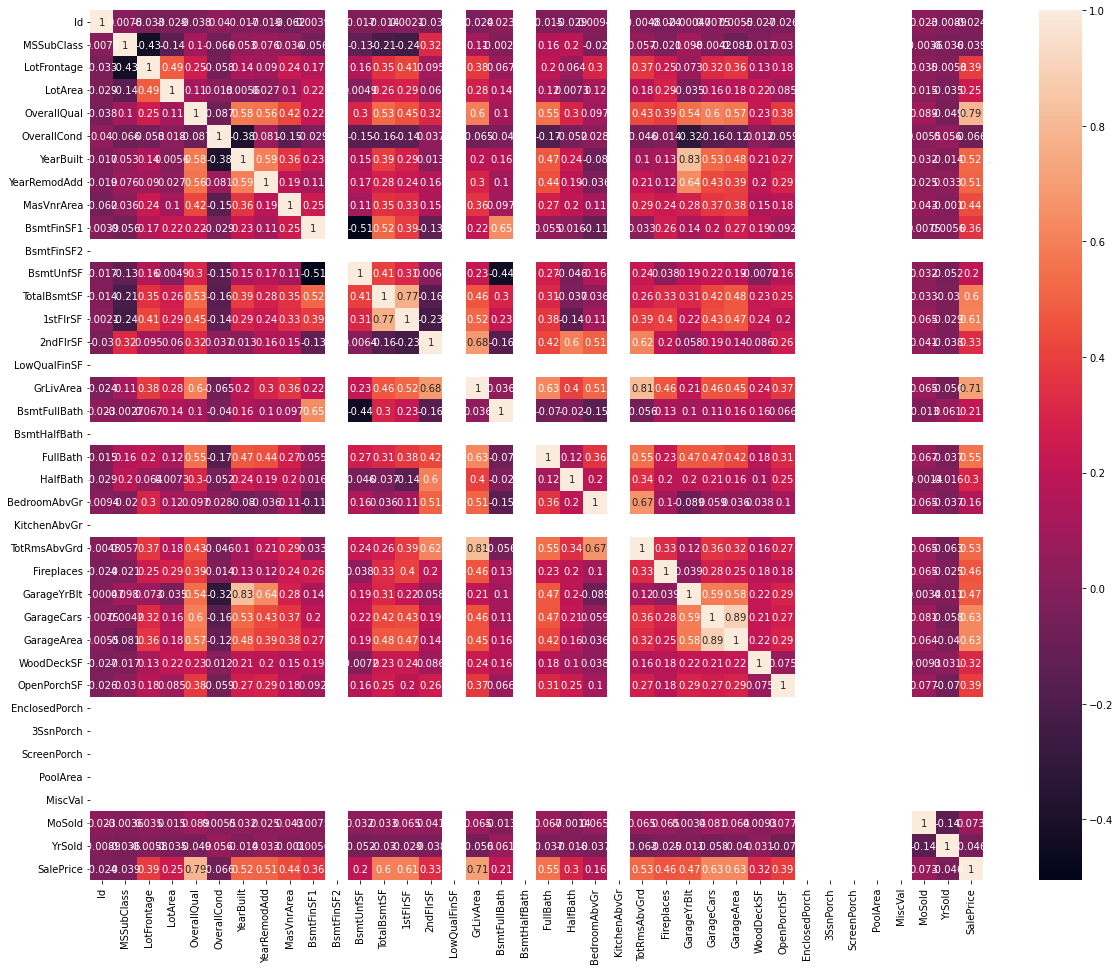

In [285]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

Comments:Some of the features have high correlation with each other
    One feature from each of these pair will be dropped after data visualization

# Univariate and Bivariate Analysis-Numerical Features

Analyzing Numerical Features with continuous values

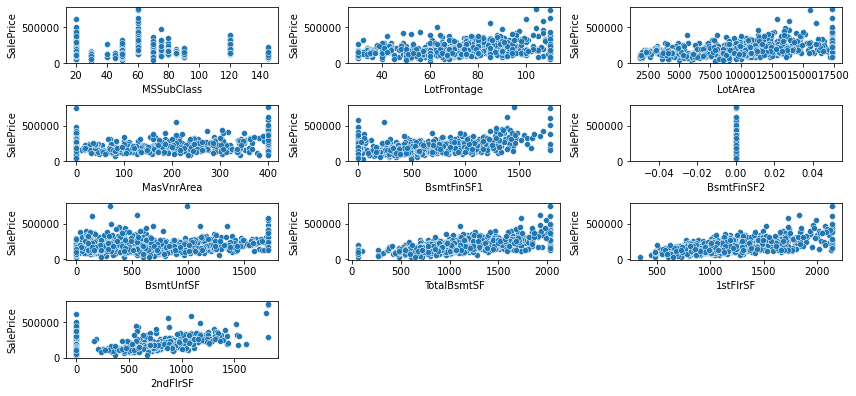

In [286]:
fig=plt.subplots(figsize=(12,12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                            'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

Comment: Feature like 'LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','2ndFlrSF'are showing positive correlation with SalePrice
    'MSSubClass' has discrete values
    'BsmtSF2' has single value and can be dropped

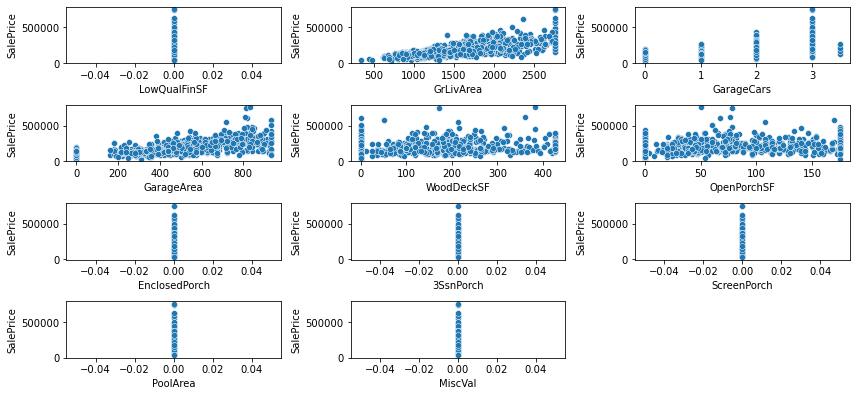

In [287]:
fig=plt.subplots(figsize=(12,12))

for i, feature in enumerate(['LowQualFinSF','GrLivArea','GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                            'ScreenPorch','PoolArea','MiscVal']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

Comment: 'GrLivArea' and 'GarageArea' are showing positive correlation with SalePrice.
    'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVar' features have single values and can be dropped

# Visualizing the distribution of the numeric features

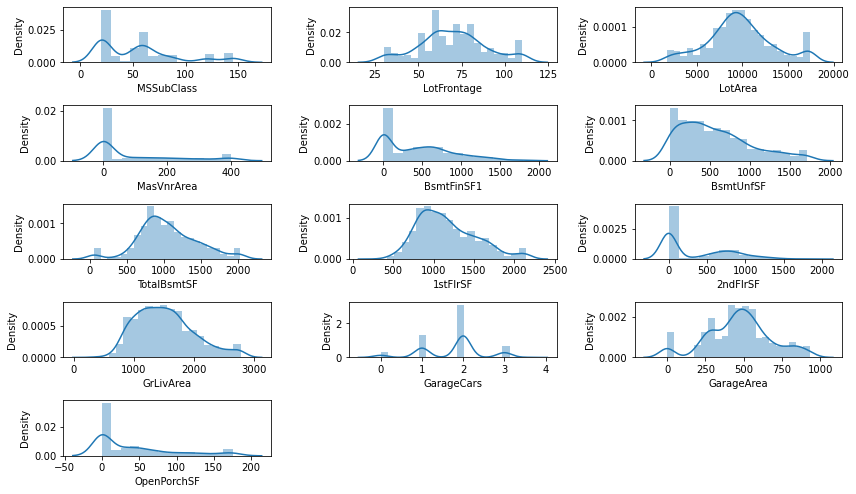

In [288]:
fig=plt.subplots(figsize=(12,12))

for i, feature in enumerate(['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                            
                            '2ndFlrSF','GrLivArea','GarageCars','GarageArea','OpenPorchSF']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.distplot(housing_df[feature])
    plt.tight_layout()

In [289]:
housing_df[['LowQualFinSF','GrLivArea','GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
           'PoolArea','MiscVal']].describe()

,LowQualFinSF,GrLivArea,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.0,1168.0,1168.0,1168.0
mean,0.0,1513.293129,1.774829,93.913099,42.927226,0.0,0.0,0.0,0.0,0.0
std,0.0,481.471291,0.741001,117.913672,53.496965,0.0,0.0,0.0,0.0,0.0
min,0.0,334.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,1143.250000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,1468.500000,2.000000,0.000000,24.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,1795.000000,2.000000,171.000000,70.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,2772.625000,3.500000,427.500000,175.000000,0.0,0.0,0.0,0.0,0.0


Removing these features having values as they won't contribute in predicting SalePrice

In [290]:
housing_df[['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1168.0,1168.0,1168.0,1168.0,1168.0,1168.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
housing_df.drop(['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

#Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

# Analyzing Numerical Features with Discrete Values

In [292]:
housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,6,5.0,2,2007,0.0,0,2,0,2.0,1,5,1.0,1977.0,1976,1976
1,8,6.0,10,2007,1.0,0,2,0,4.0,1,8,1.0,1970.0,1970,1970
2,7,5.0,6,2007,1.0,0,2,1,3.0,1,8,1.0,1997.0,1996,1997
3,6,6.0,1,2010,0.0,0,2,0,3.0,1,7,1.0,1977.0,1977,1977
4,6,7.0,6,2009,0.0,0,2,0,3.0,1,8,1.0,1977.0,1977,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,5,5.0,2,2010,0.0,0,1,0,3.0,1,5,0.0,1970.0,1967,1967
1164,4,5.0,5,2009,0.0,0,2,0,2.0,1,5,0.0,2002.0,1949,2003
1165,6,6.0,7,2009,0.0,0,2,1,3.0,1,7,1.0,1976.0,1976,1976
1166,4,4.0,7,2008,0.0,0,1,0,3.0,1,6,0.0,1920.0,1920,1950


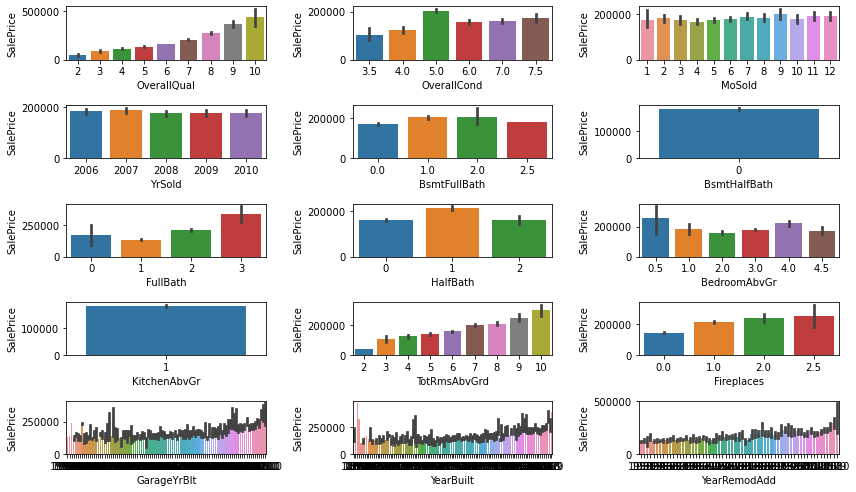

In [293]:
fig=plt.subplots(figsize=(12,12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                            'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.barplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

Comment: Following are the observationns from the plots.
    OverallQual:More the rating of this feature,more the SalePrice(target variable)
    OverallCond: SalePrice is highest for rating 5
    MoSold and YrSold: SalePrice does not show a strong trend depending on month and year on which realty is sold.
    FullBath:2 and'HalfBath'=1 have highest SalePrice.
    TotRmsAbvGrd:More the numer of total rooms above grade more the Sale Price.
    GarageYrBlt,YearBuilt,YearRemodAdd,YrSold:Will extract new features from to identify any trend
    BsmtFullBath, KitchenAbvGr: Need further inspection for meaningful insight

In [294]:
housing_df[['BsmtFullBath','KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd
count,1168.000000,1168.0,1104.000000,1168.000000,1168.000000
mean,0.425086,1.0,1978.193841,1970.958904,1984.758562
std,0.519702,0.0,24.890704,30.061548,20.785185
min,0.000000,1.0,1900.000000,1885.000000,1950.000000
25%,0.000000,1.0,1961.000000,1954.000000,1966.000000
50%,0.000000,1.0,1980.000000,1972.000000,1993.000000
75%,1.000000,1.0,2002.000000,2000.000000,2004.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000


In [295]:
print(housing_df['BsmtFullBath'].value_counts())
print(housing_df['KitchenAbvGr'].value_counts())

0.0    686
1.0    468
2.0     13
2.5      1
Name: BsmtFullBath, dtype: int64
1    1168
Name: KitchenAbvGr, dtype: int64


In [296]:
# dropping KitchenAbvGr for not having useful information
housing_df.drop(['KitchenAbvGr'],axis=1,inplace=True)

In [297]:
housing_df[['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1104.000000,1168.000000,1168.000000,1168.000000
mean,1978.193841,1970.958904,1984.758562,2007.804795
std,24.890704,30.061548,20.785185,1.329738
min,1900.000000,1885.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1966.000000,2007.000000
50%,1980.000000,1972.000000,1993.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [298]:
# Converting the year related features into number of years

for feature in['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']:
    housing_df[feature]=2022-housing_df[feature]

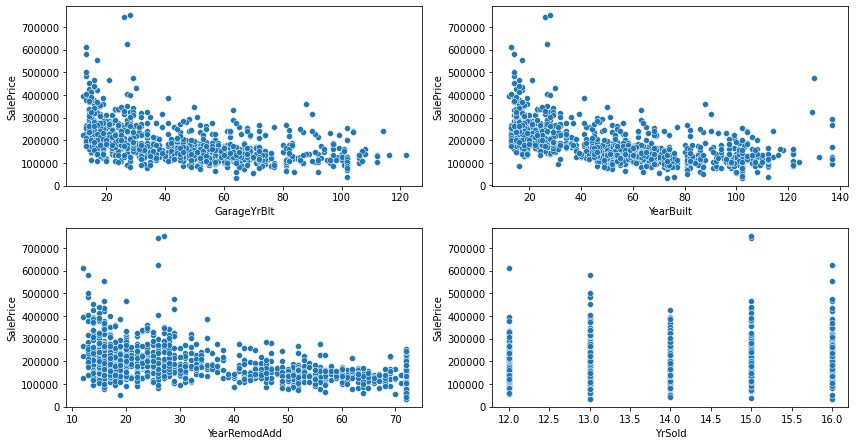

In [299]:
fig=plt.subplots(figsize=(12,12))
for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.scatterplot(housing_df[feature],housing_df['SalePrice'])
    plt.tight_layout()

Comment: For most the realty properties Garage is built within last 20 years, SalePrice is more recently built garages.
SalePrice is more lower value of YearBuilt i.e. more recently build houses.
Recently remodeledhouses(lower value of YearRemodAdd) have higher SalePrice.
YrSold still does not show any significant trend.

# Missing Value Handling-Numerical Features

In [300]:
print("Feature : Percentage of Missing Value")
print("======================================")

for feat in housing_df.select_dtypes(exclude=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ':',round(housing_df[feat].isnull().sum()/housing_df.shape[0],2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0
MasVnrArea : 1.0
GarageYrBlt : 5.0


In [301]:
# Since MasvnrArea has only 1% data missing, dropping rows with NULL values in MasVnArea
# Dropping id column as it does not conribute towards predicting SalePrice

housing_df=housing_df[~housing_df['MasVnrArea'].isnull()]
housing_df.drop(['Id'],axis=1,inplace=True)
numeric_df.drop(['Id'],axis=1,inplace=True)

In [302]:
# Checking the number of remaining columns
housing_df.columns.shape

(73,)

Comment:
GarageCars and GarageArea have high correlation, dropping GargeCars
GarageYrBilt and YearBuilt have hige correlation, dropping GarageYrBlt for high correlation and containing missing value
TotRmsAbvGrd and GrLivArea have high correlation, dropping GrLivArea
TotalBsmtSF and 1stflrSF have high correlation, dropping TotalBsmtSF
Missing Value imputation to be done for housing_df[LotFrontage] after spliitting data into train and test set to avoid data leakage

In [303]:
housing_df.drop(['GarageCars','GarageYrBlt','GrLivArea','TotalBsmtSF'],axis=1,inplace=True)

# Checking the number of remaining columns
print(housing_df.columns.shape)

(69,)


# Analyzing Categorical Features

In [304]:
# Categorical feturess in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Missing Value Handling-Categorical Features

In [305]:
print("Feature : Percentage of Missing Value")
print("======================================")

for feat in housing_df.select_dtypes(include=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0],2)*100)

Feature : Percentage of Missing Value
Alley : 93.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 99.0
Fence : 80.0
MiscFeature : 96.0


In [306]:
housing_df['Electrical'].isnull().sum()

0

In [307]:
housing_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

Comment:
For 'Alley'NaN neabs 'No access to alley'.
For BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 Nan means 'No Basement'.
For GarageType, GarageFinish, GarageQual, GarageCond Nan means "No garage".
For FireplaceQu and Fence Nan means 'No Fire Place'and 'No Fence' respectively.
MiscFeature-Nan means no additional features mentioned.

In [308]:
mv_categorical_features=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish',
                        'GarageQual','GarageCond','FireplaceQu','Fence','MiscFeature']
print(housing_df[mv_categorical_features].isnull().sum())

Alley           1085
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
GarageType        64
GarageFinish      64
GarageQual        64
GarageCond        64
FireplaceQu      548
Fence            924
MiscFeature     1117
dtype: int64


In [309]:
# Imputing missing values with Not_applicable
housing_df[mv_categorical_features]=housing_df[mv_categorical_features].fillna(value='Not_applicable',axis=1)

# Checking after imputation
print(housing_df[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [310]:
# dropping PoolQC for very high percentage of missing value and highy imbalance data(if missing value is imputed)
housing_df.drop(['PoolQC'],axis=1,inplace=True)

# dropping rows with null values in Electrical for very low missing value count
housing_df.dropna(subset=['Electrical'],inplace=True)

In [311]:
print("Feature : Percentage of Missing Value")
print("======================================")
for feat in housing_df.columns:
    if housing_df[feat].isnull().any():
        print(feat, ':',round(housing_df[feat].isnull().sum()/housing_df.shape[0],2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0


Missing Value imputation will be done after splitting the data into train and test set to avoid data leakage

In [312]:
housing_df.columns.shape

(68,)

In [313]:
# Function to generate boxplot for SalePrice against differennt features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20,16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4,2,i+1)
        plt.subplots_adjust(hspace=2.0)
        sns.boxplot(housing_df['SalePrice'],housing_df[feature])
        plt.tight_layout()

Dividing the ordinal features into smaller segments andd visualizing their impact on SalePrice.

# Analyzing Ordered Features

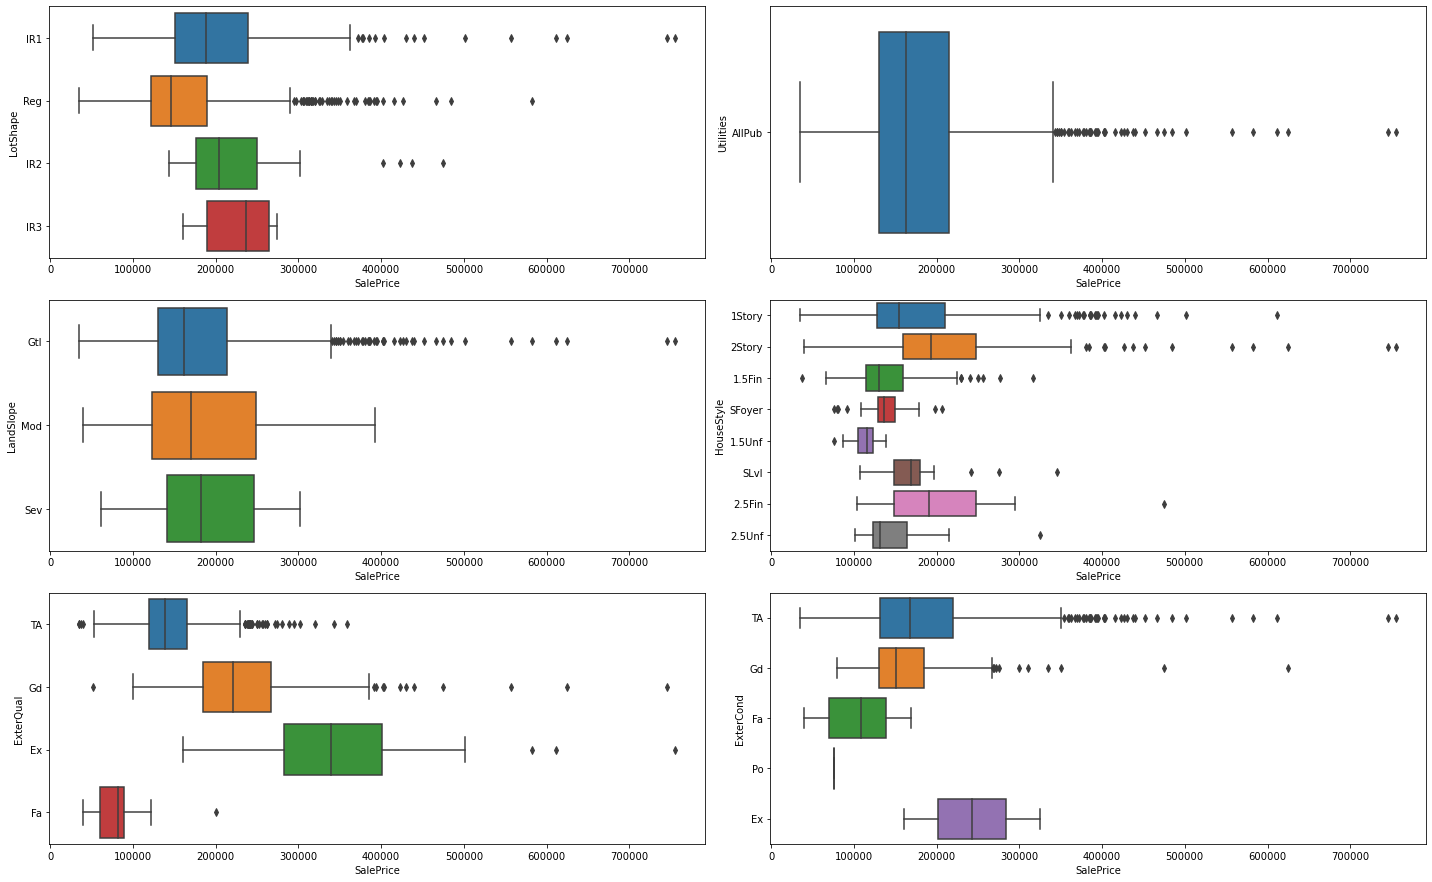

In [314]:
ext_features=['LotShape','Utilities','LandSlope','HouseStyle','ExterQual','ExterCond']
generate_boxplot(ext_features)

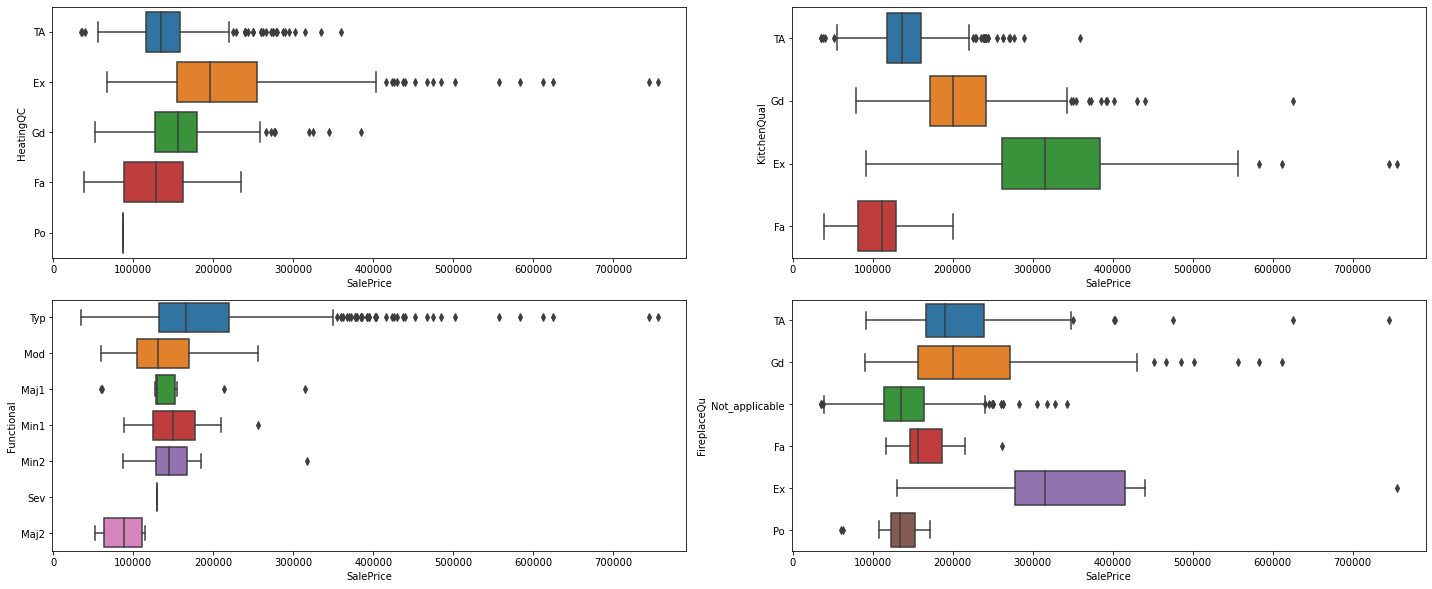

In [315]:
int_features=['HeatingQC','KitchenQual','Functional','FireplaceQu']

generate_boxplot(int_features)

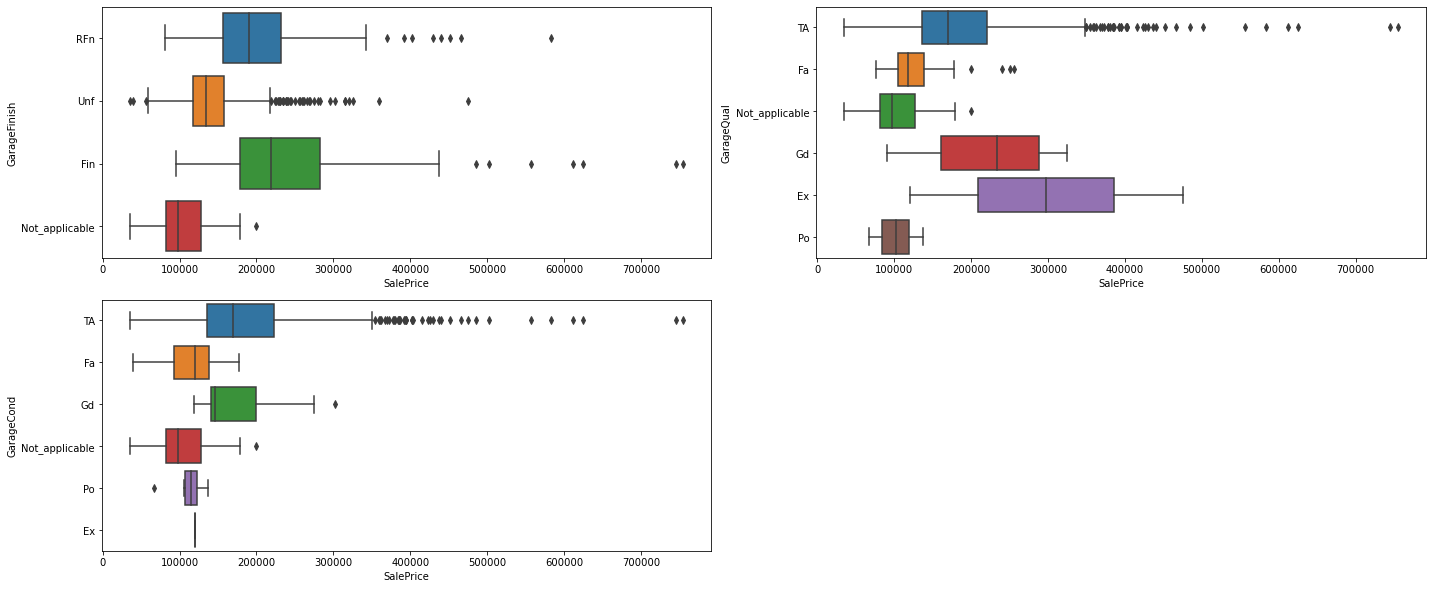

In [316]:
garage_features=['GarageFinish','GarageQual','GarageCond']

generate_boxplot(garage_features)

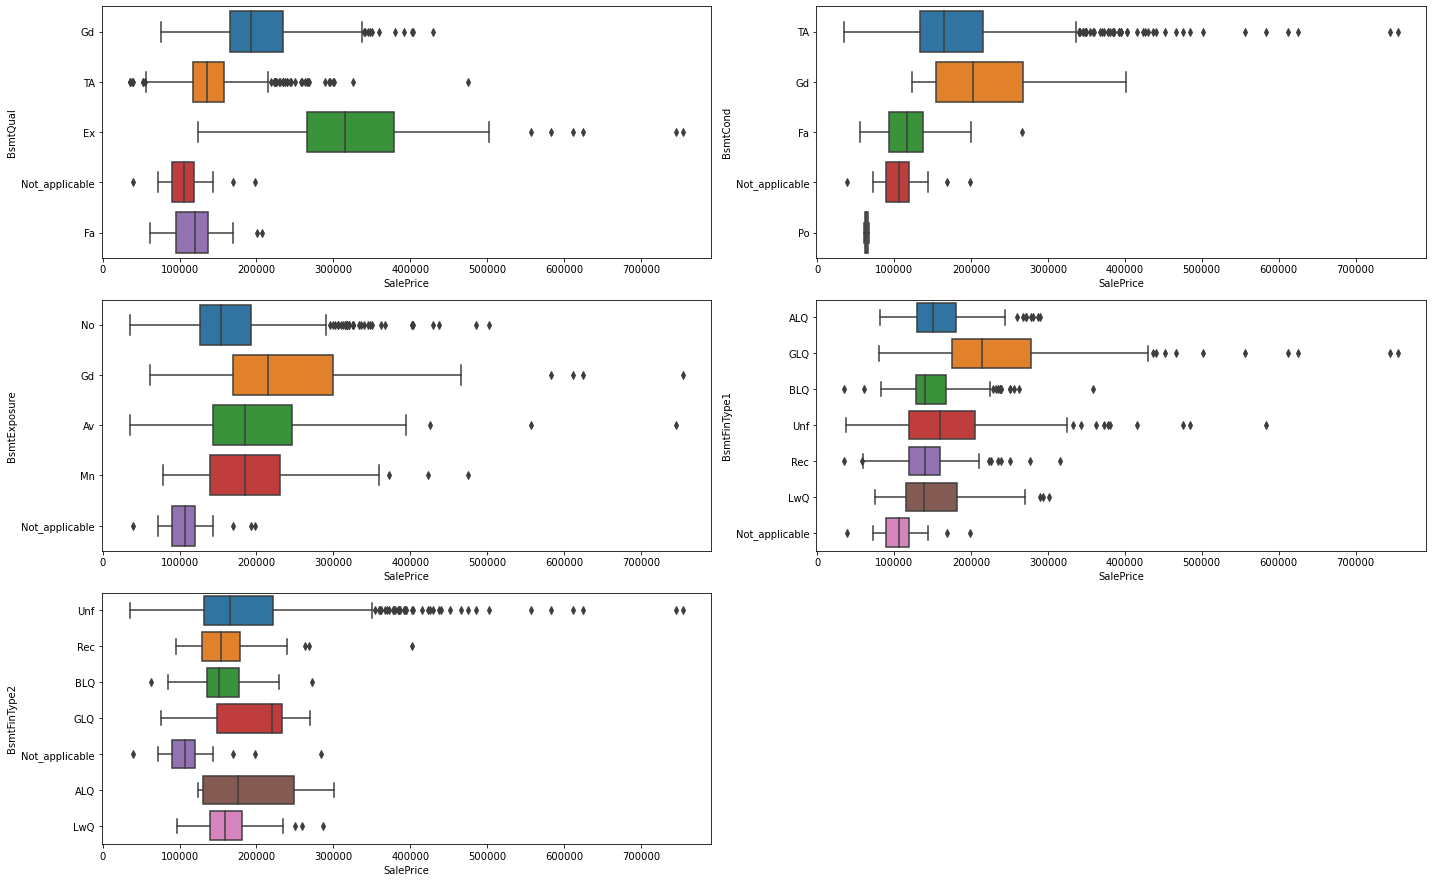

In [317]:
basement_features=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

generate_boxplot(basement_features)

# Encoding Categorical Features

In [318]:
housing_df['LotShape']=housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities']=housing_df['Utilities'].map({'AllPub':3,'NoSewr':2,'NoSewa':1,'ELO':0})
housing_df['LandSlope']=housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle']=housing_df['HouseStyle'].map({'1Story':0,'1.SUnf':1,'1.SFin':2,'2Story':3,'2.SUnf':4,'2.SFin':5,'SFoyer':6,
                                                     'SLvl':7})
housing_df['ExterQual']=housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond']=housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual']=housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond']=housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'GD':4,'Ex':5})
housing_df['BsmtExposure']=housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1']=housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2']=housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC']=housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir']=housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual']=housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'GD':3,'Ex':4})
housing_df['GarageFinish']=housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual']=housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond']=housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional']=housing_df['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})
housing_df['FireplaceQu']=housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [319]:
# Checking the features after encoding
housing_df[['LotShape','Utilities','LandSlope','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
           'BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','GarageFinish','GarageQual','GarageCond',
           'Functional','FireplaceQu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1167
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotShape      1161 non-null   int64  
 1   Utilities     1161 non-null   int64  
 2   LandSlope     1161 non-null   int64  
 3   HouseStyle    1011 non-null   float64
 4   ExterQual     1161 non-null   int64  
 5   ExterCond     1161 non-null   int64  
 6   BsmtQual      1161 non-null   int64  
 7   BsmtCond      1106 non-null   float64
 8   BsmtExposure  1161 non-null   int64  
 9   BsmtFinType1  1161 non-null   int64  
 10  BsmtFinType2  1161 non-null   int64  
 11  HeatingQC     1161 non-null   int64  
 12  CentralAir    1161 non-null   int64  
 13  KitchenQual   688 non-null    float64
 14  GarageFinish  1161 non-null   int64  
 15  GarageQual    1161 non-null   int64  
 16  GarageCond    1161 non-null   int64  
 17  Functional    1161 non-null   int64  
 18  FireplaceQu   1161 non-null 

# Analyzing Unordered Features

In [320]:
unordered_features=['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
                   'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical',
                   'GarageType','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']

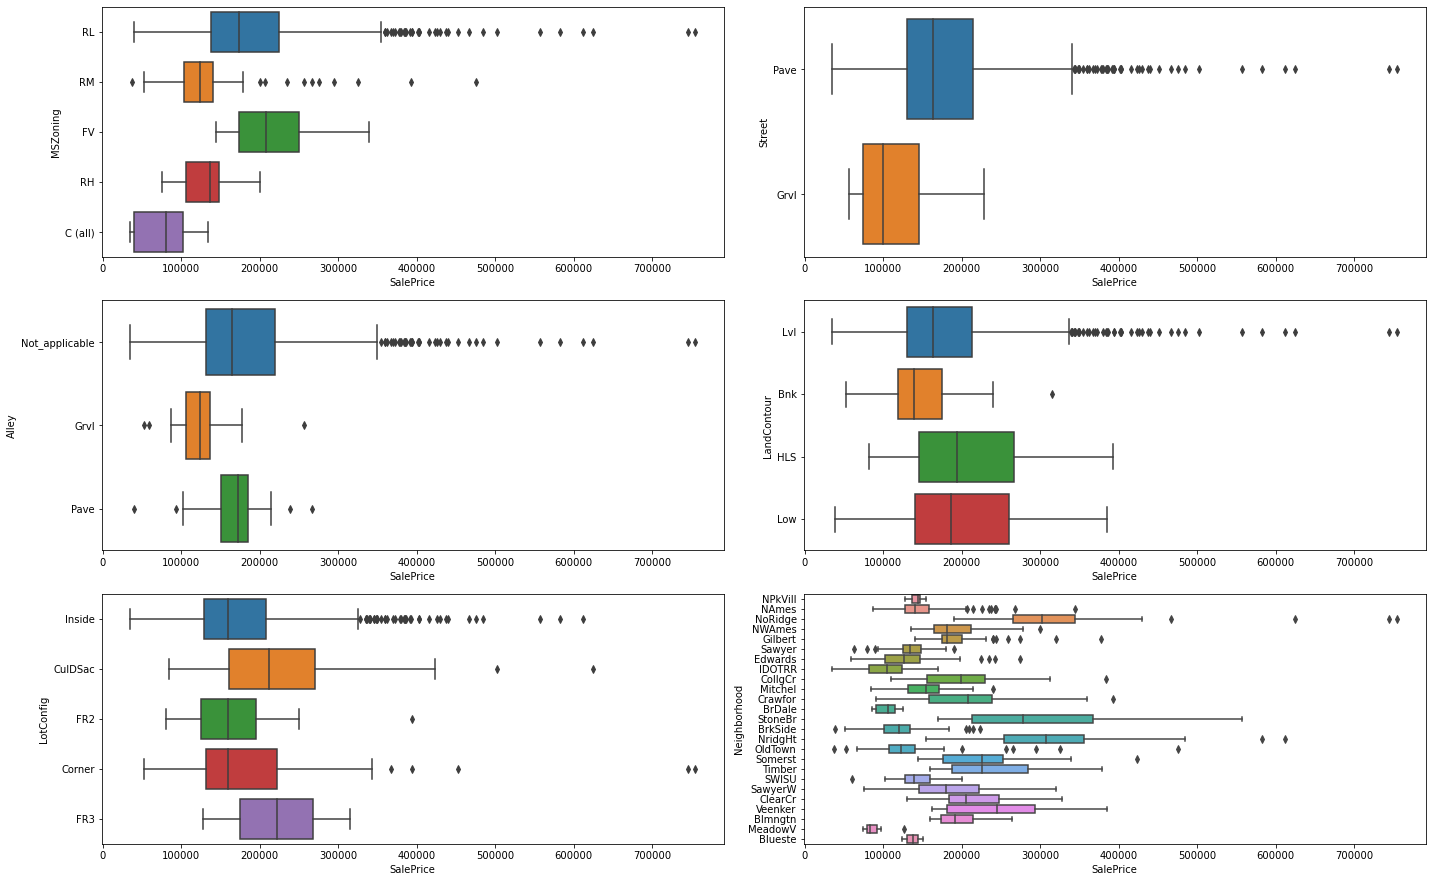

In [321]:
generate_boxplot(['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood'])

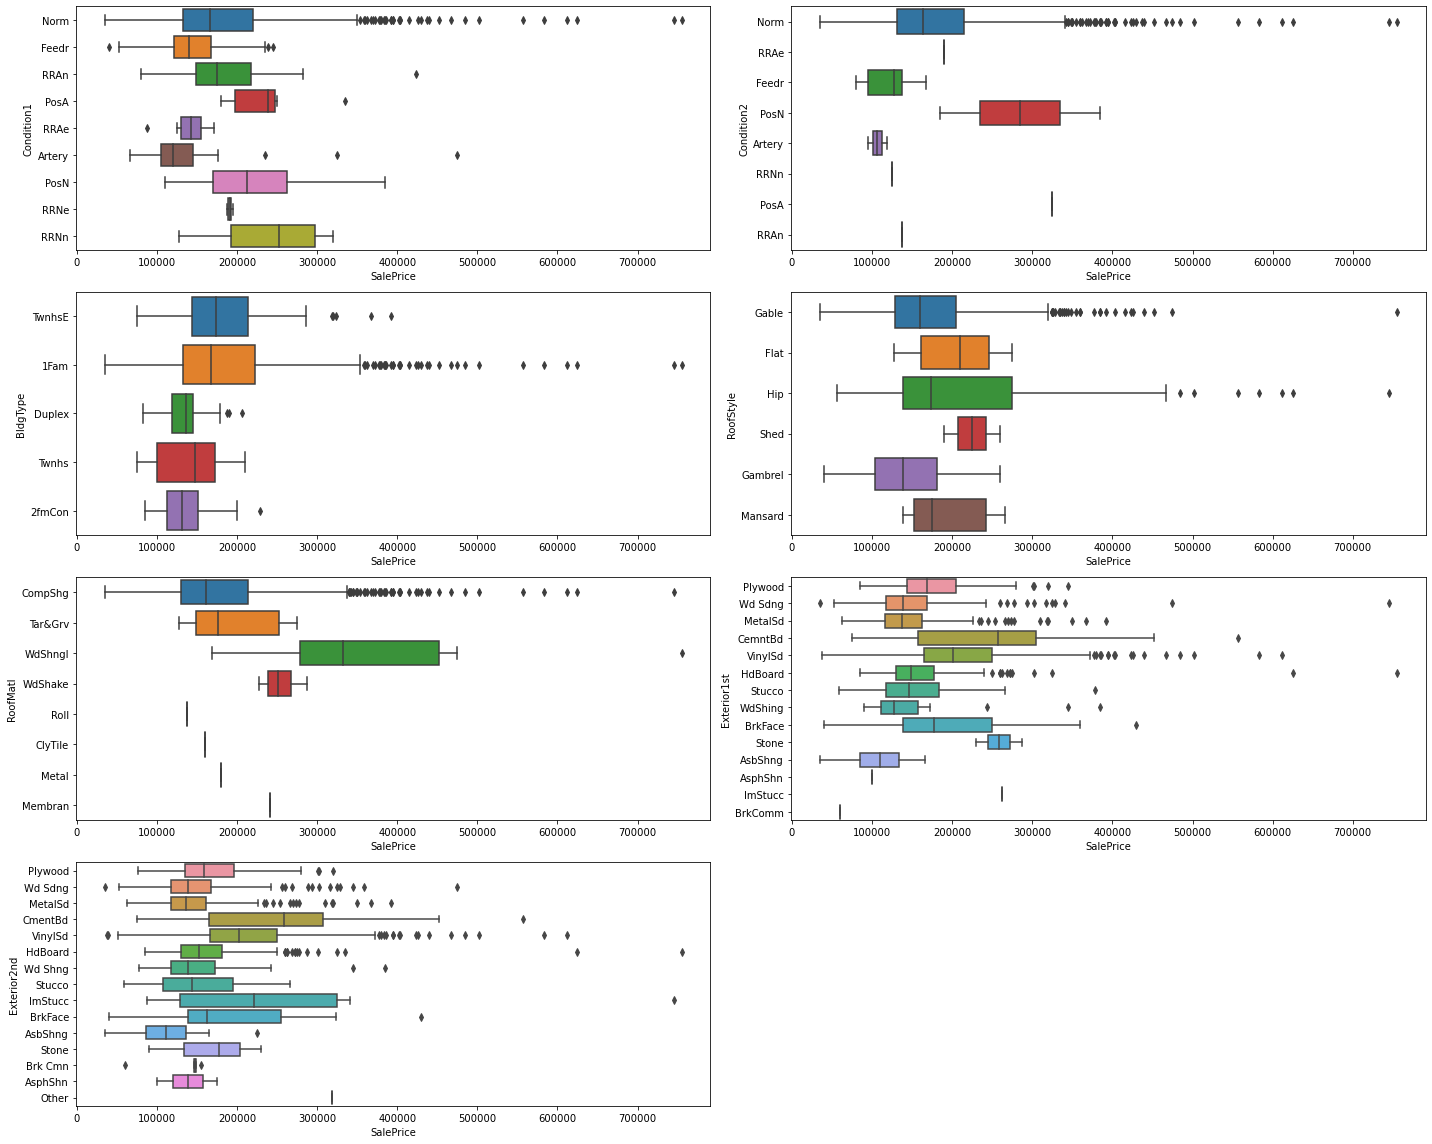

In [322]:
generate_boxplot(['Condition1','Condition2','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd'])

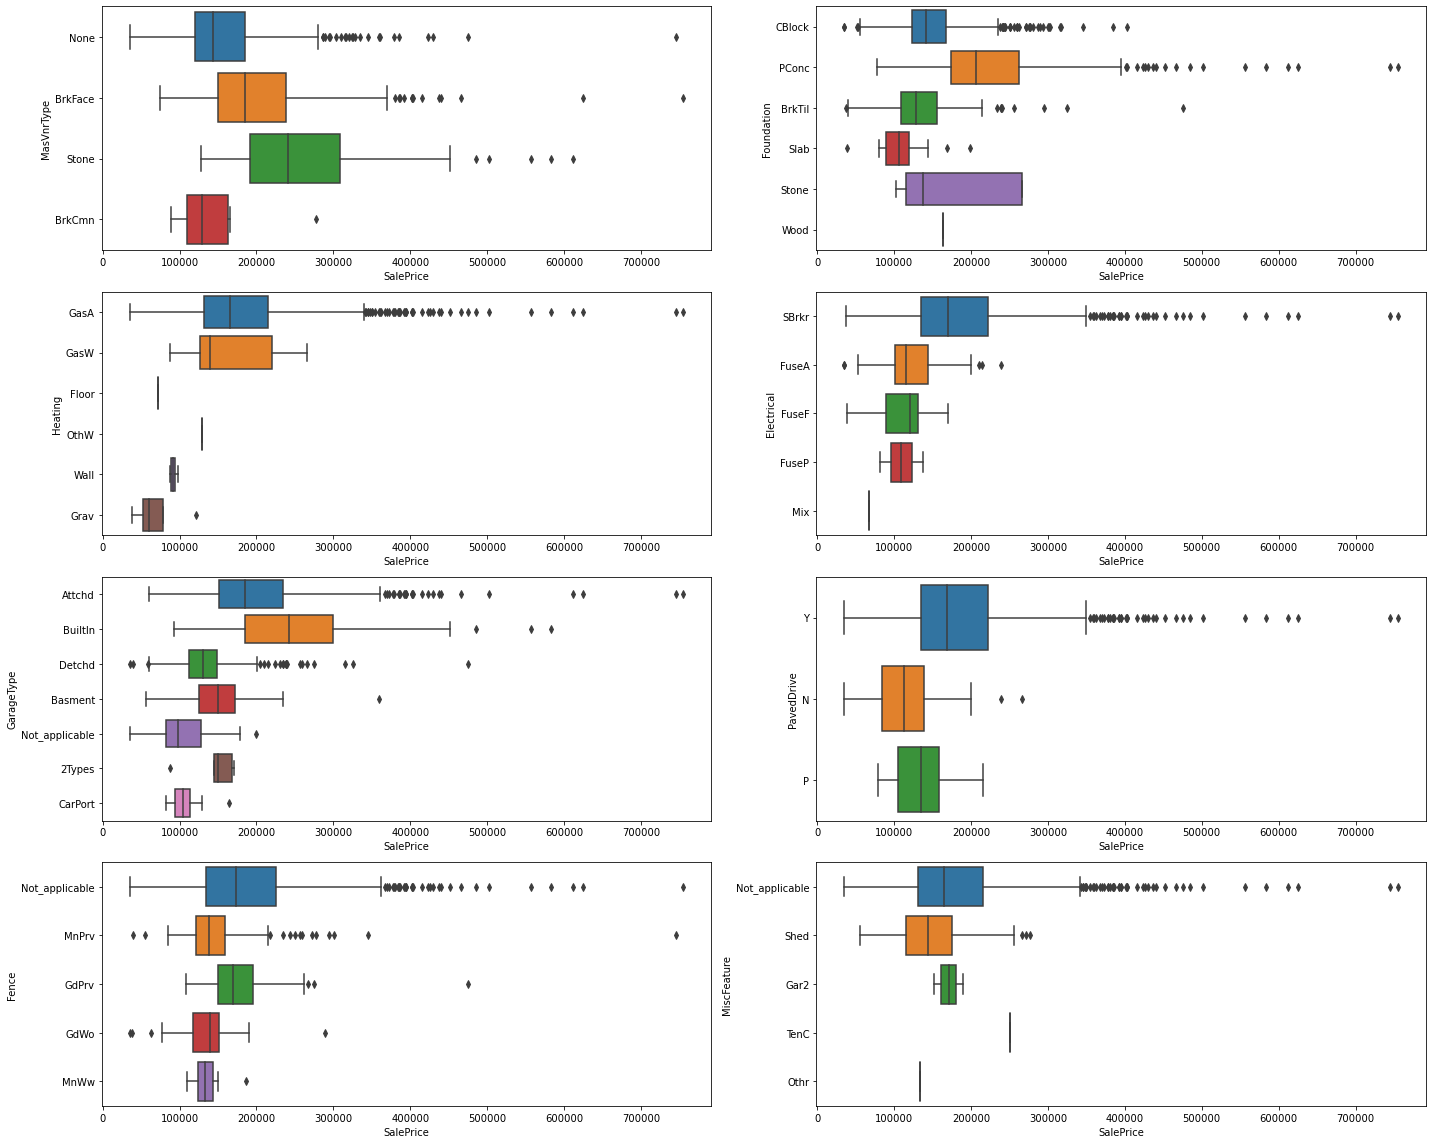

In [323]:
generate_boxplot(['MasVnrType','Foundation','Heating','Electrical','GarageType','PavedDrive','Fence','MiscFeature'])

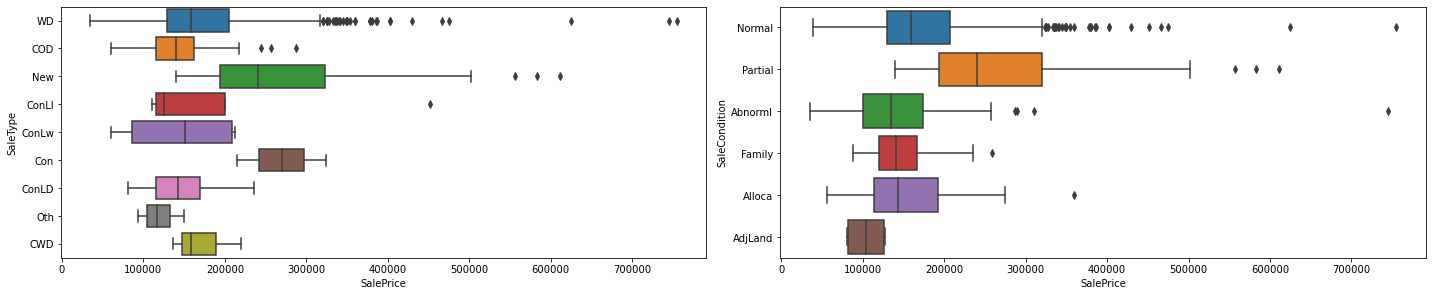

In [324]:
generate_boxplot(['SaleType','SaleCondition'])

# Encoding Categorical Variables

In [325]:
dummy_df=pd.get_dummies(housing_df[unordered_features],drop_first=True)

In [326]:
dummy_df.shape

(1161, 142)

Comment:
Adding 142 features to the existing dataset will make the model very complex
From the above boxplot, for some categorical fetures only label is dominating over others.
In dummy_df any label having same value in 95% or more rows wil be dropped, as those new features are highly imbalanced

In [327]:
dummies_to_drop=[]
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0]>=0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))
    

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [328]:
# Dropping the highly imbalanced dummy variables

dummy_df=dummy_df.drop(dummies_to_drop,axis=1)
print(dummy_df.shape)

(1161, 52)


In [329]:
# Adding the dummy variables to the original dataframe
housing_df=pd.concat([housing_df,dummy_df],axis=1)

# Importing the redundant columns
housing_df=housing_df.drop(unordered_features,axis=1)

In [330]:
housing_df.shape

(1161, 97)

In [331]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1167
Data columns (total 97 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSSubClass                  1161 non-null   int64  
 1   LotFrontage                 949 non-null    float64
 2   LotArea                     1161 non-null   float64
 3   LotShape                    1161 non-null   int64  
 4   Utilities                   1161 non-null   int64  
 5   LandSlope                   1161 non-null   int64  
 6   HouseStyle                  1011 non-null   float64
 7   OverallQual                 1161 non-null   int64  
 8   OverallCond                 1161 non-null   float64
 9   YearBuilt                   1161 non-null   int64  
 10  YearRemodAdd                1161 non-null   int64  
 11  MasVnrArea                  1161 non-null   float64
 12  ExterQual                   1161 non-null   int64  
 13  ExterCond                   1161 

In [332]:
housing_df['LotFrontage'].unique()

array([ nan,  95.,  92., 105.,  58.,  88.,  70.,  80.,  50.,  44., 110.,
        59.,  55.,  64.,  30.,  68.,  71.,  74.,  61.,  60.,  84.,  65.,
        76., 100.,  85.,  75., 107.,  82.,  62.,  73.,  79.,  77.,  41.,
        69.,  90.,  96.,  72.,  34.,  78.,  63.,  40.,  98., 108.,  51.,
        81.,  99.,  66.,  37.,  87.,  53.,  47.,  86.,  56.,  89.,  52.,
       104.,  57.,  83.,  46., 101.,  93.,  49.,  43.,  54.,  91.,  67.,
        97., 103.,  94.,  35.,  48.,  36., 109., 102.,  32.,  42.,  38.,
        39.,  45., 106.])

In [333]:
housing_df['LotFrontage']=housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())

In [334]:
housing_df['HouseStyle']=housing_df['HouseStyle'].fillna(housing_df['HouseStyle'].median())

In [335]:
housing_df['KitchenQual']=housing_df['KitchenQual'].fillna(housing_df['KitchenQual'].median())

In [336]:
housing_df['BsmtCond']=housing_df['BsmtCond'].fillna(housing_df['BsmtCond'].median())

In [337]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1167
Data columns (total 97 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSSubClass                  1161 non-null   int64  
 1   LotFrontage                 1161 non-null   float64
 2   LotArea                     1161 non-null   float64
 3   LotShape                    1161 non-null   int64  
 4   Utilities                   1161 non-null   int64  
 5   LandSlope                   1161 non-null   int64  
 6   HouseStyle                  1161 non-null   float64
 7   OverallQual                 1161 non-null   int64  
 8   OverallCond                 1161 non-null   float64
 9   YearBuilt                   1161 non-null   int64  
 10  YearRemodAdd                1161 non-null   int64  
 11  MasVnrArea                  1161 non-null   float64
 12  ExterQual                   1161 non-null   int64  
 13  ExterCond                   1161 

# Splitting into Train and Test Data

In [338]:
x=housing_df.drop(['SalePrice'],axis=1)
x.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,120,70.0,4928.0,0,3,0,0.0,6,5.0,46,...,0,0,1,0,1,1,0,1,1,0
1,20,95.0,15865.0,0,3,1,0.0,8,6.0,52,...,0,0,1,0,1,1,0,1,1,0
2,60,92.0,9920.0,0,3,0,3.0,7,5.0,26,...,0,0,1,0,1,1,0,1,1,0
3,20,105.0,11751.0,0,3,0,0.0,6,6.0,45,...,0,0,1,1,0,1,0,0,1,0
4,20,70.0,16635.0,0,3,0,0.0,6,7.0,45,...,0,0,1,0,1,1,0,1,1,0


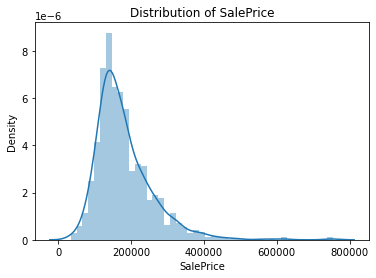

In [339]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'])
plt.show()

Comment:Since SalePrice is highly right skewed. checking the distribution of transformed SalePrice

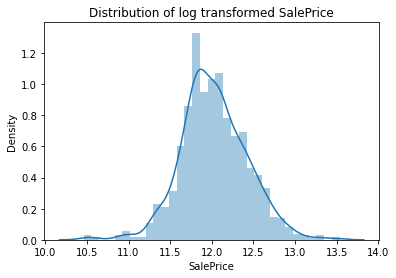

In [340]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [341]:
# Log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y=np.log(housing_df['SalePrice'])
print(y)

0       11.759786
1       12.498742
2       12.505399
3       12.154779
4       12.278393
          ...    
1163    11.711776
1164    11.589887
1165    11.908340
1166    10.596635
1167    12.118334
Name: SalePrice, Length: 1161, dtype: float64


In [342]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=101)

In [343]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(928, 96)
(233, 96)
(928,)
(233,)


# Feature Scaling

In [344]:
x_train.values

array([[6.0000e+01, 6.9000e+01, 9.5880e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.0000e+01, 7.3000e+01, 8.7600e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+01, 1.1000e+02, 1.4442e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [5.0000e+01, 6.0000e+01, 1.0410e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.2000e+02, 4.0000e+01, 4.6710e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 8.0000e+01, 1.2984e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [345]:
ss=StandardScaler()
ss.fit(x_train)

StandardScaler()

In [346]:
x_tr_scaled=pd.DataFrame(data=ss.transform(x_train), columns=x_train.columns)
x_te_scaled=pd.DataFrame(data=ss.transform(x_test), columns=x_test.columns)

In [347]:
# Checking the features after
print(x_tr_scaled)
print(x_te_scaled)

     MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      0.120692    -0.049826 -0.016668 -1.374625        0.0  -0.220360   
1      0.120692     0.177671 -0.252924  0.750281        0.0  -0.220360   
2     -0.945998     2.282018  1.368343  0.750281        0.0  -0.220360   
3      0.120692     0.575791  0.169370  0.750281        0.0  -0.220360   
4     -0.945998     1.144533  1.275038 -1.374625        0.0  -0.220360   
..          ...          ...       ...       ...        ...        ...   
923    2.387410    -0.561695  0.064652  0.750281        0.0  -0.220360   
924    2.387410     0.007048  2.199948  0.750281        0.0   3.245634   
925   -0.145980    -0.561695  0.217876  0.750281        0.0  -0.220360   
926    1.720728    -1.699180 -1.419655 -1.374625        0.0  -0.220360   
927   -0.945998     0.575791  0.952326  0.750281        0.0  -0.220360   

     HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0      0.814946     1.380450   

# Model Building

In [355]:
#Import the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [356]:
# Model Training
lr=LinearRegression()
lr.fit(x_tr_scaled, y_train)

svm=SVR()
svm.fit(x_tr_scaled, y_train)

rf=RandomForestRegressor()
rf.fit(x_tr_scaled, y_train)

gr=GradientBoostingRegressor()
gr.fit(x_tr_scaled, y_train)

GradientBoostingRegressor()

In [357]:
# Prediction on test data
y_pred1=lr.predict(x_te_scaled)
y_pred2=svm.predict(x_te_scaled)
y_pred3=rf.predict(x_te_scaled)
y_pred4=gr.predict(x_te_scaled)

In [358]:
df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [359]:
df1

,Actual,lr,svm,rf,gr
701,11.532728,11.632601,11.446945,11.656112,11.589872
657,11.808948,11.809510,11.820764,11.905852,11.909152
599,11.751942,11.714595,11.797886,11.756068,11.730201
214,12.049419,11.928784,11.906321,11.840537,11.847409
300,13.229568,12.979483,13.033692,12.790059,12.885209
...,...,...,...,...,...
1160,11.849398,11.852568,11.798852,11.863198,11.865609
676,11.440355,11.316984,11.457721,11.607196,11.488422
530,12.665394,12.572807,12.348944,12.528920,12.553327
338,12.739638,12.547754,12.758666,12.602172,12.638912


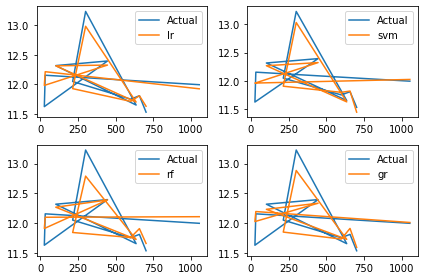

In [361]:
# Compare performance visually
import matplotlib.pyplot as plt

plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.tight_layout()
plt.legend()

In [362]:
# Evaluating the Algorithm
from sklearn import metrics

In [363]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [364]:
print(score1, score2, score3, score4)

0.8915571508326268 0.8440058882473518 0.8418610878599222 0.8581256199647994


On the basis of r2 score linear regression is our best model.

In [365]:
s1=metrics.mean_absolute_error(y_test, y_pred1)
s2=metrics.mean_absolute_error(y_test, y_pred2)
s3=metrics.mean_absolute_error(y_test, y_pred3)
s4=metrics.mean_absolute_error(y_test, y_pred4)

In [366]:
print(s1, s2, s3, s4)

0.08773221712857607 0.10301888327136637 0.11067568318175829 0.0999978560880695


In [368]:
# Save Model Using Joblib
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [369]:
import joblib

In [370]:
joblib.dump(lr,'model_joblib_lr')

['model_joblib_lr']

In [371]:
model=joblib.load('model_joblib_lr')